In [16]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
Data_R = pd.read_csv("Running.csv")
Data_R

,attr_x,attr_y,attr_z,class
0,-0.051475,9.563639,0.266954,2
1,-0.025139,9.600150,-0.026935,2
2,0.020351,9.601347,0.219668,2
3,-0.041899,9.575610,0.107141,2
4,0.068833,9.633669,-0.055665,2
...,...,...,...,...
926615,10.790668,0.096367,0.761955,2
926616,10.580576,0.627879,1.213860,2
926617,10.429741,0.756568,1.334169,2
926618,9.898827,0.884059,1.049259,2


In [18]:
Data_W = pd.read_csv("Walking.csv")
Data_W

,attr_x,attr_y,attr_z,class
0,0.055665,9.621099,-0.011372,1
1,0.073622,9.554062,-0.077812,1
2,0.077812,9.537901,-0.155025,1
3,0.113725,9.567230,-0.159214,1
4,0.116717,9.599552,-0.104746,1
...,...,...,...,...
810709,9.731233,-0.829591,1.444901,1
810710,9.526528,-0.908001,1.290475,1
810711,9.511565,-0.818817,1.276708,1
810712,9.703699,-0.750582,1.404199,1


<AxesSubplot:>

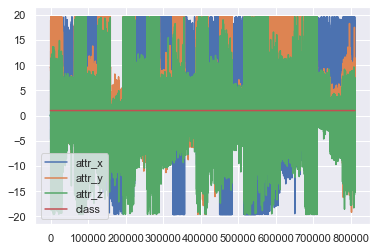

In [19]:
Data_W.plot()

In [20]:
Data_S = pd.read_csv("Sitting.csv")
Data_S

,attr_x,attr_y,attr_z,class
0,-0.017957,9.598953,0.057461,0
1,-0.007781,9.601347,0.047285,0
2,-0.012570,9.595961,0.061651,0
3,-0.013767,9.591770,0.074220,0
4,-0.016161,9.591770,0.049081,0
...,...,...,...,...
704176,9.535507,2.271499,1.966837,0
704177,9.549273,2.261324,1.998560,0
704178,9.571420,2.288857,2.006341,0
704179,9.501390,2.302624,1.994968,0


In [21]:
Data_Frame = [Data_R, Data_W, Data_S]
Data = pd.concat(Data_Frame,ignore_index=True)

In [22]:
Data

,attr_x,attr_y,attr_z,class
0,-0.051475,9.563639,0.266954,2
1,-0.025139,9.600150,-0.026935,2
2,0.020351,9.601347,0.219668,2
3,-0.041899,9.575610,0.107141,2
4,0.068833,9.633669,-0.055665,2
...,...,...,...,...
2441510,9.535507,2.271499,1.966837,0
2441511,9.549273,2.261324,1.998560,0
2441512,9.571420,2.288857,2.006341,0
2441513,9.501390,2.302624,1.994968,0


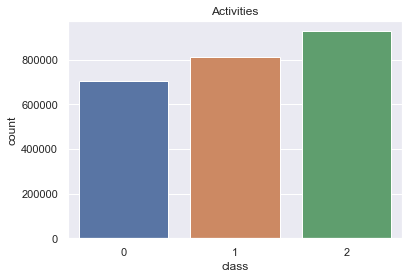

In [23]:
sns.set_theme(style="darkgrid")
sns.countplot(x='class', data = Data)
plt.title('Activities')
plt.show()

## Preparing input data for GRU model

In [36]:

random_seed =150  
Class = 3
Time_steps = 12
step = 12
Features = 3

In [37]:
Data_parts = []
labels = []

for i in range(0,  Data.shape[0]- Time_steps, step):

    xs = Data['attr_x'].values[i: i + Time_steps]
    ys = Data['attr_y'].values[i: i + Time_steps]
    zs = Data['attr_z'].values[i: i + Time_steps]
    
    from scipy import stats
    label=stats.mode(Data['class'][i: i + Time_steps])[0][0]
    Data_parts.append([xs, ys, zs])
    labels.append(label)

reshaped_segments = np.asarray(Data_parts, dtype= np.float32).reshape(-1, Time_steps, Features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.1, random_state = random_seed)

In [39]:
X_train.shape

(183113, 12, 3)

In [40]:
X_train[0]

array([[ 6.085462  ,  9.003395  , 17.07425   ],
       [19.607914  , 19.484612  , 19.607914  ],
       [15.733497  , 12.768876  , 12.367847  ],
       [12.875419  , 13.681067  , 10.521319  ],
       [-0.04010288,  0.15562311, -3.0627825 ],
       [ 1.5101427 ,  1.1528081 ,  7.617751  ],
       [ 4.144962  ,  0.7846996 , -3.0777464 ],
       [-1.9339164 , -1.3000516 , -2.6952724 ],
       [-1.4694413 ,  1.4664485 ,  5.801151  ],
       [-5.331289  , -9.927557  , -2.795829  ],
       [ 2.2092497 ,  2.259528  , -1.8303672 ],
       [ 0.6123171 ,  3.265691  ,  4.174889  ]], dtype=float32)

In [41]:
X_test[0]

array([[-9.705495  , -9.69532   , -9.685144  ],
       [-9.689933  , -9.701904  , -9.694721  ],
       [-9.683948  , -9.698911  , -9.67856   ],
       [-9.685144  , -9.680356  , -9.702502  ],
       [ 0.7188591 ,  0.7266402 ,  0.7206547 ],
       [ 0.7015011 ,  0.7015011 ,  0.7068881 ],
       [ 0.7086837 ,  0.7068881 ,  0.7182605 ],
       [ 0.7236475 ,  0.7182605 ,  0.7230489 ],
       [ 0.842759  ,  0.84934306,  0.8535329 ],
       [ 0.8439561 ,  0.83497787,  0.83378077],
       [ 0.8439561 ,  0.8439561 ,  0.8475474 ],
       [ 0.82599956,  0.8463503 ,  0.8319851 ]], dtype=float32)

In [42]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [43]:
X_test.shape

(20346, 12, 3)

## GRU Model

In [44]:
model = Sequential()
model.add(GRU(units = 128, return_sequences=False ,input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(units = 128, activation='sigmoid'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               51072     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 76,035
Trainable params: 76,035
Non-trainable params: 0
_________________________________________________________________


In [46]:
epochs = 5
batch_size = 12 

In [47]:
history = model.fit(X_train, y_train, epochs = epochs, validation_split = 0.15, batch_size = batch_size, verbose = 1)

Epoch 1/5
12971/12971 [==============================] - 70s 5ms/step - loss: 0.1653 - accuracy: 0.9417 - val_loss: 0.1256 - val_accuracy: 0.9578
Epoch 2/5
12971/12971 [==============================] - 68s 5ms/step - loss: 0.1069 - accuracy: 0.9644 - val_loss: 0.1033 - val_accuracy: 0.9653
Epoch 3/5
12971/12971 [==============================] - 70s 5ms/step - loss: 0.0951 - accuracy: 0.9679 - val_loss: 0.1137 - val_accuracy: 0.9612
Epoch 4/5
12971/12971 [==============================] - 68s 5ms/step - loss: 0.0899 - accuracy: 0.9693 - val_loss: 0.0973 - val_accuracy: 0.9664
Epoch 5/5
12971/12971 [==============================] - 68s 5ms/step - loss: 0.0849 - accuracy: 0.9705 - val_loss: 0.0916 - val_accuracy: 0.9691


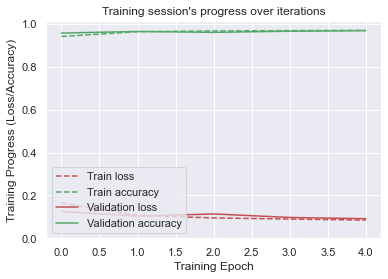

In [48]:
# Plotting training and validation accuracy and cross-entropy loss against a number of epochs –
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

636/636 [==============================] - 2s 2ms/step


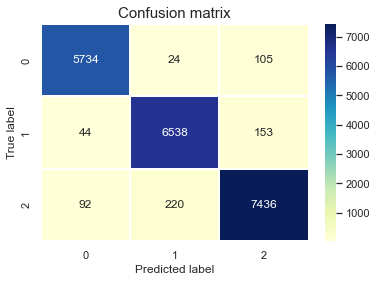

In [49]:
predictions = model.predict(X_test)
class_labels = [0,1,2]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
from sklearn.metrics import confusion_matrix
confs_mat = confusion_matrix(max_test, max_predictions)

sns.heatmap(confs_mat, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
#Converting the model for android application
import tensorflow as tf
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tfmodel = converter.convert()
open('Final_Acc_Model.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\kirta\AppData\Local\Temp\tmprrl26a15\assets


INFO:tensorflow:Assets written to: C:\Users\kirta\AppData\Local\Temp\tmprrl26a15\assets


317836